# Lending Club Case Study

**Problem Statement**

Lending Club is consumer finance company which specializes in lending various type of loan. 
When company receives a loan application, it decides to accept or reject the loan based on applicant's profile.
Once loan is approved, there are two possibilities, either the applicant will repay the full loan amount or he will default on the loan amount.

The past loan applicantion data is available on whether they defaulted or not.
The company wants to understand the driving factors behind loan default.

In [1]:
#import the libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# read the dataset
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
loan.shape

(39717, 111)

### Data understanding and data cleaning

In [4]:
#Check the null values in columns
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
#Check the null values percentage in columns
loan.isna().sum() * 100 / len(loan)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

**We can see that there are columns with 100% null values. So we can drop these columns.**

In [6]:
#Drop columns with 100% null values
loan = loan.dropna(axis = 1, how = 'all')
loan.shape

(39717, 57)

In [7]:
#Check the null values percentage in columns
loan.isna().sum() * 100 / len(loan)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


**There are columns with more than 50% null values. We can drop these columns as well as these features will not help in taking decision.**

In [8]:
# Drop below columns as it has more than 50% null values and cannot be useful in taking decision:

# mths_since_last_delinq
# mths_since_last_record
# next_pymnt_d columns
loan = loan.drop(['mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d'], axis=1)

In [9]:
# id and member_id column can be dropped as it will not have any impact on deciding loan approval
loan = loan.drop(['id', 'member_id'], axis=1)

In [10]:
# Drop all the columns which has only one unique value. Single unique(constant) value cannot be a factor in taking decisions 
for col in loan.columns:
    if len(loan[col].unique()) == 1:
        loan.drop(col,inplace=True,axis=1)

In [11]:
#Check the shape of the dataframe after dropping columns
loan.shape

(39717, 46)

In [12]:
# Following columns can also be dropped(Justification given)

# emp_title   - This column has so many different values and appropriate categorization or bucketing of the values seems illogical.
# url         - This is not a deciding attribute of loan as the loan details url will be available only after approval.
# desc        - This column is a description column and appropriate categorization cannot be done. Also it has more than 30% missing data. 
#               However after applying NLP, some important insights can be drawn from this column.
# title       - The loan title provided by the borrower has a mix of mumerical and text values. 
#               Borrower seems to be entering random text in this field.

loan = loan.drop(['emp_title','url','desc','title'], axis=1)
loan.shape

(39717, 42)

In [13]:
# collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens can be dropped as it has value either 0 or null. 
# Null can be considered as 0 for these column values. After replacing null with 0, there will be only one unique value for the variable 
# hence it cannot be a deciding factor for loan approval
loan = loan.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths', 'tax_liens'], axis=1)
loan.shape

(39717, 39)

**Since we have to identify the factors behind loan default before loan approval,**
**We can drop columns which are applicable only post approval of loan i.e. Consumer behavior during loan tenure.**

| Column Name | Explanation |
| :- | :- |
| collection_recovery_fee | This is collection fee for defaulted loan 
| collection_recovery_fee | This is collection fee for defaulted loan
| delinq_2yrs             | How many times borrower went delinquent in last 2 years i.e skipped one payment and then continued
| earliest_cr_line        | Month in which the earliest credit line was opened
| inq_last_6mths          | The number of enquiries in last 6 month is again a post loan approval data
| last_credit_pull_d      | Most recent month that company pulled credit for the loan
| last_pymnt_amnt         | Last payment amount received during loan tenure
| last_pymnt_d            | Last month payment received during loan tenure 
| open_acc                | Open credit line means a borrower can borrow and repay loan as long as credit line is open. The number of open credit line may keep on changing with loan tenure.
| out_prncp               | Outstanding principal amount for the funded amount will keep reducing with the loan payment 
| out_prncp_inv           | Outstanding principal amount for the amount funded by investor will keep reducing with loan payment
| pub_rec                 | Derogatory public reords are those which are not paid as agreed.
| recoveries              | Recoveries amount after charge off(loan default)
| revol_bal               | Revolving balance is the amount which remains unpaid after payment date. This is also post loan approval factor
| revol_util              | Revolving utilization rate is again dependent on revolving balance hence can be dropped.
| total_acc               | The total number of credit lines(open+closed) may keep on changing with lona tenure.
| total_pymnt             | Total payments received against funded amount
| total_pymnt_inv         | Total payments received against investor funded amount
| total_rec_int           | Total interest received against funded amount
| total_rec_late_fee      | Total late fee received
| total_rec_prncp         | Total principal received
| funded_amnt             | Funded amount decided after approving the loan
| funded_amnt_inv         | Funded amount by investor is decided once company approves the loan

In [14]:
# We can drop columns which are applicable only post approval of loan i.e. Consumer behavior during loan tenure.
colsToDrop = ['collection_recovery_fee','delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d',
              'last_pymnt_amnt','last_pymnt_d','open_acc','out_prncp','out_prncp_inv', 'pub_rec','recoveries',
              'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int',
              'total_rec_late_fee','total_rec_prncp','funded_amnt','funded_amnt_inv']

loan = loan.drop(colsToDrop, axis=1)
loan.shape

(39717, 17)

In [15]:
# Copying loan dataframe in another dataframe to avoid re calculating above steps in case of any error during further processing
loan1 = loan.copy()
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_length            38642 non-null  object 
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  issue_d               39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  zip_code              39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

**emp_length and pub_rec_bankruptcies column has null values which should be imputed**

In [16]:
# emp_length column contains values for employment length in years. Possible values are from 0 to 10
loan1["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [17]:
# replace the null value in emp_length column with mode of emp_length value which is 10+ years
loan1['emp_length'] = loan1['emp_length'].fillna(loan1['emp_length'].mode()[0])

In [18]:
# Extract the actual employment year from given emp_length values
# replace year and years text with empty string

loan1["emp_length"] = loan1["emp_length"].apply(lambda x: x.replace("years","")).apply(lambda x: x.replace("year",""))
loan1["emp_length"] = loan1["emp_length"].apply(lambda x: x.strip())

# replace 10+ years with 10
# replace < 1 year with 0
loan1["emp_length"] = loan1["emp_length"].apply(lambda x: 10 if x == "10+" else (0 if x == "< 1" else x))


In [19]:
# Convert emp_length column to int datatype
loan1["emp_length"] = loan1["emp_length"].astype('int32')


In [20]:
# Check the value frequency for pub_rec_bankruptcies column
loan1["pub_rec_bankruptcies"].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [21]:
# Since the most common value for public recorded bankruptcies is 0 hence the null value can be filled with 0
loan1["pub_rec_bankruptcies"] = loan1["pub_rec_bankruptcies"].fillna(0)
loan1["pub_rec_bankruptcies"].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [22]:
loan1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,2500,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,309xx,GA,1.00,0.0
2,2400,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,606xx,IL,8.72,0.0
3,10000,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,917xx,CA,20.00,0.0
4,3000,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,Source Verified,11-Dec,Current,other,972xx,OR,17.94,0.0


In [23]:
# Replace the % character for interest rate column and convert it to float type
loan1["int_rate"] = loan1["int_rate"].apply(lambda x: x.replace("%","")).astype("float")

In [24]:
# Extract month information from issue date column as the loan default may have some impact 
# depending on the time of year the loan was approved.
loan1["issue_d"] = loan1["issue_d"].apply(lambda x: x[-3:])


In [25]:
# Since we have to analyze the factors for which borrower will either make full payment or he will default
# therefore we can drop the loan_status with value 'Current'
loan2 =loan1[loan1["loan_status"] != 'Current']
loan2.shape

(38577, 17)

In [26]:
# Convert Fully paid to 0 and charged off to 1

loan2["loan_status"] = loan2["loan_status"].apply(lambda x: 1 if x == "Charged Off" else 0).astype("int32")
loan2["loan_status"].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

**Outlier Treatment:**

In [27]:
# Check the quantitative spread of all the quantitive features
loan2.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000
mean,11047.025430,11.932219,322.466318,5.076445,6.877797e+04,0.145864,13.272727,0.042694
std,7348.441646,3.691327,208.639215,3.602917,6.421868e+04,0.352975,6.673044,0.202809
min,500.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000
25%,5300.000000,8.940000,165.740000,2.000000,4.000000e+04,0.000000,8.130000,0.000000
50%,9600.000000,11.710000,277.860000,4.000000,5.886800e+04,0.000000,13.370000,0.000000
75%,15000.000000,14.380000,425.550000,9.000000,8.200000e+04,0.000000,18.560000,0.000000
max,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,1.000000,29.990000,2.000000


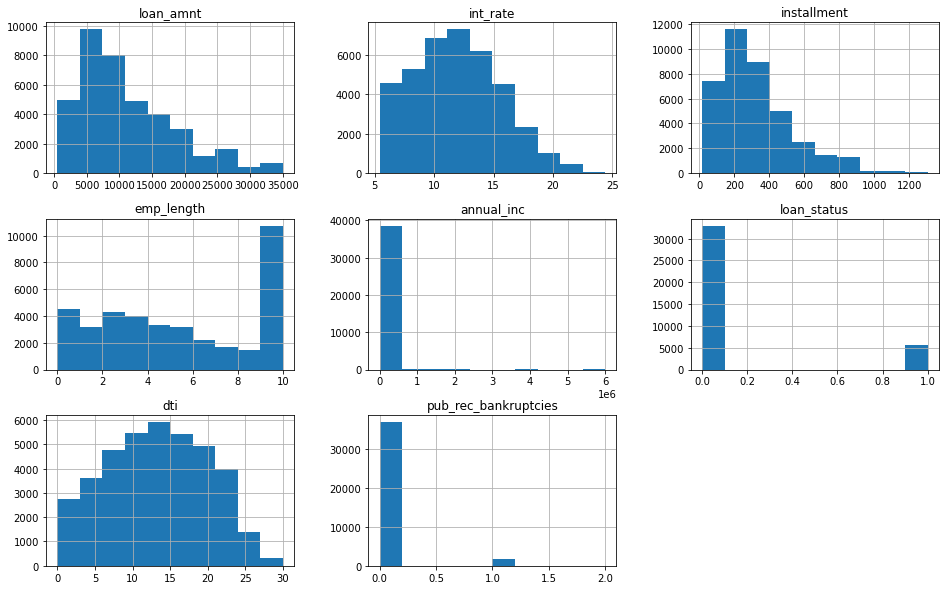

In [28]:
# Check the numerical data destribution of all the quantitive features
loan2.hist(figsize=(16, 10))
plt.show()

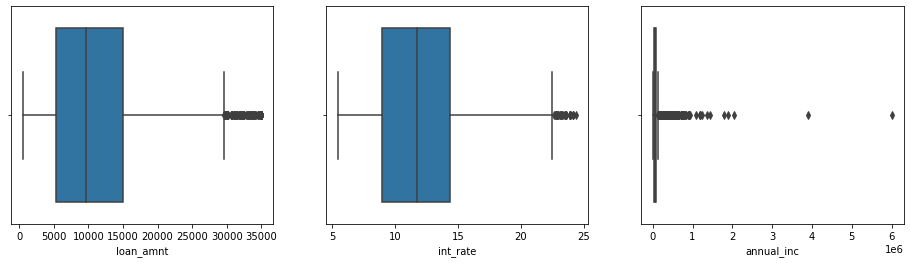

In [29]:
# Box plot to identify the outliers
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

sns.boxplot(loan2["loan_amnt"], ax=ax[0])
sns.boxplot(loan2["int_rate"], ax=ax[1])
sns.boxplot(loan2["annual_inc"], ax=ax[2])
plt.show()

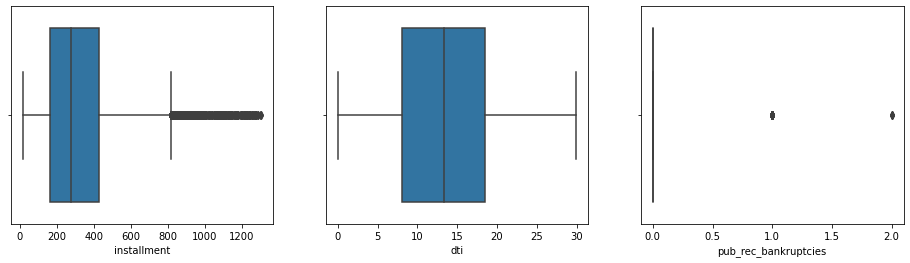

In [30]:
# Box plot to identify the outliers
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

sns.boxplot(loan2["installment"], ax=ax[0])
sns.boxplot(loan2["dti"], ax=ax[1])
sns.boxplot(loan2["pub_rec_bankruptcies"], ax=ax[2])

plt.show()

**Above chart suggests that there are some outliers for loan amount, annual income, installment, interest rate and public recorded bankruptcies feature. We can figure out the same using the IQR formula.**

In [31]:
# Find out the outlier upper range and lower range for quantitative features
df = []
res={}
index = 0
for col in ['annual_inc','loan_amnt',"int_rate","installment","dti","pub_rec_bankruptcies"]:
    q1 = loan2[col].quantile(0.25)
    q3 = loan2[col].quantile(0.75)
    iqr = q3 - q1
    lr = q1 - 1.5 * iqr 
    ur = q3 + 1.5 * iqr
    res["Column"] = col
    res["LowerRange"] = lr
    res["UpperRange"] = ur
    res["Min"] = min(loan2[col])
    res["Max"] = max(loan2[col])
    res["UpperRangeOutlier"] = "yes" if (res["Max"]> res["UpperRange"]) else "no"
    res["LowerRangeOutlier"] = "yes" if (res["Min"]< res["LowerRange"]) else "no"
    df.append(res.copy())
    
pd.DataFrame(df)

,Column,LowerRange,UpperRange,Min,Max,UpperRangeOutlier,LowerRangeOutlier
0,annual_inc,-23000.000,145000.000,4000.00,6000000.00,yes,no
1,loan_amnt,-9250.000,29550.000,500.00,35000.00,yes,no
2,int_rate,0.780,22.540,5.42,24.40,yes,no
3,installment,-223.975,815.265,15.69,1305.19,yes,no
4,dti,-7.515,34.205,0.00,29.99,no,no
5,pub_rec_bankruptcies,0.000,0.000,0.00,2.00,yes,no


**It is proved that annual income, loan amount, interest rate, installment and pub rec bankruptcies feature has outliers**

In [32]:
# Treat the outliers
loan2["annual_inc"] = np.where(loan2["annual_inc"] > 145000,145000,loan2["annual_inc"])
loan2["loan_amnt"] = np.where(loan2["loan_amnt"] > 29550,29550,loan2["loan_amnt"])
loan2["int_rate"] = np.where(loan2["int_rate"] > 22.540,22.540,loan2["int_rate"])
loan2["installment"] = np.where(loan2["installment"] > 815.265,815.265,loan2["installment"])
loan2["pub_rec_bankruptcies"] = np.where(loan2["pub_rec_bankruptcies"] > 0,0,loan2["pub_rec_bankruptcies"])


In [33]:
#After treating the outliers of pub_rec_bankruptcies column it has only one value which is 0.0. 
#Since the value is constant for all the loan, we can drop this column.
loan2 = loan2.drop("pub_rec_bankruptcies", axis=1)

In [34]:
# reset the index after data cleaning
loan2.reset_index(inplace = True, drop= True)
loan2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti
0,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec,0,credit_card,860xx,AZ,27.65
1,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec,1,car,309xx,GA,1.00
2,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec,0,small_business,606xx,IL,8.72
3,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec,0,other,917xx,CA,20.00
4,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec,0,wedding,852xx,AZ,11.20


In [35]:
# Rename the columns to a better understandatble name
loan2.rename(columns={"loan_amnt":"Loan Amount","term":"Loan Term","installment":"Installment Amount","grade":"Grade",
                     "sub_grade":"Subgrade","emp_length":"Employment Length","int_rate":"Interest Rate",
                      "home_ownership":"Home Ownership","annual_inc":"Annual Income","verification_status":"Verification Status",
                     "issue_d":"Issue Month","loan_status":"Loan Status","purpose":"Purpose","zip_code":"Zip Code",
                     "addr_state":"State","dti":"DebtToIncome"}, inplace=True)

In [36]:
loan2.head()

,Loan Amount,Loan Term,Interest Rate,Installment Amount,Grade,Subgrade,Employment Length,Home Ownership,Annual Income,Verification Status,Issue Month,Loan Status,Purpose,Zip Code,State,DebtToIncome
0,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec,0,credit_card,860xx,AZ,27.65
1,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec,1,car,309xx,GA,1.00
2,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec,0,small_business,606xx,IL,8.72
3,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec,0,other,917xx,CA,20.00
4,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec,0,wedding,852xx,AZ,11.20


### Univariate analysis---------------

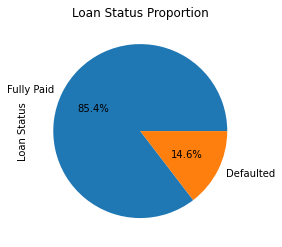

In [37]:
loan2["Loan Status"].value_counts(1).plot.pie(autopct='%1.1f%%', labels=["Fully Paid","Defaulted"],title="Loan Status Proportion")
plt.show()

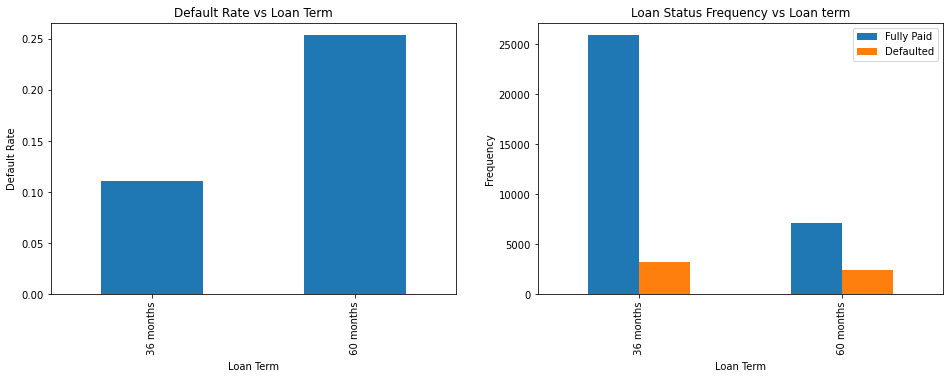

In [38]:
# plot the default rate against Loan Term
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

loan2.groupby("Loan Term")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Loan Term")

loan2.groupby("Loan Term")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Loan term")
plt.legend(["Fully Paid","Defaulted"]);

plt.show()



**Default rate is highest for 60 month loan term**

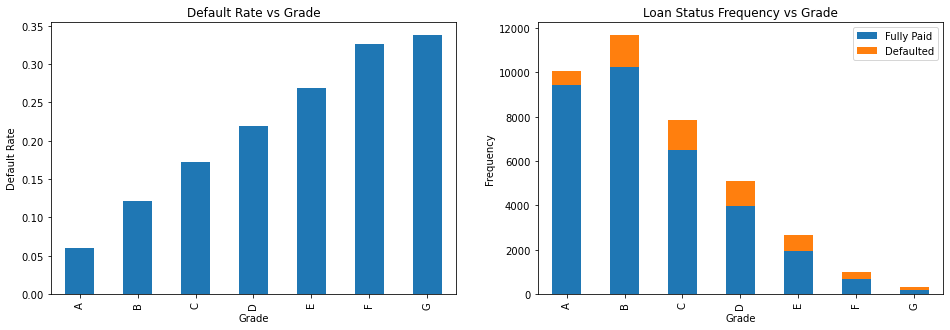

In [39]:
# plot the default rate against Grade
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

loan2.groupby("Grade")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Grade")

loan2.groupby("Grade")["Loan Status"].value_counts().unstack().plot.bar(stacked= True, ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Grade")
plt.legend(["Fully Paid","Defaulted"]);

plt.show()


**Default rate is highest for grade F and G**

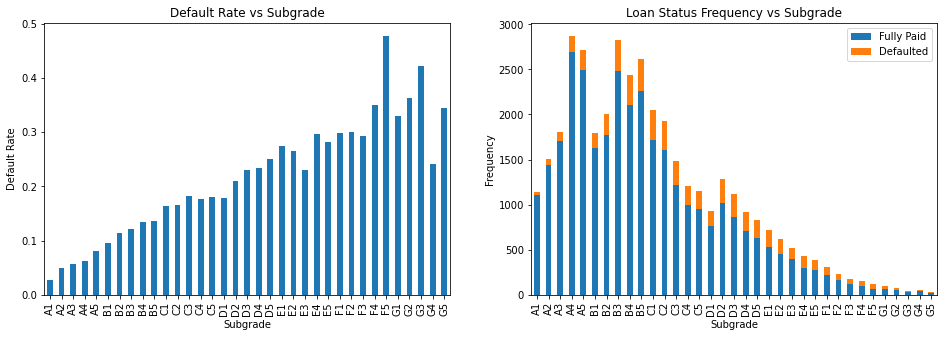

In [40]:
# plot the default rate against Subgrade
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("Subgrade")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Subgrade")

loan2.groupby("Subgrade")["Loan Status"].value_counts().unstack().plot.bar(stacked= True, ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Subgrade")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Default rate is highest for subgrade F5**

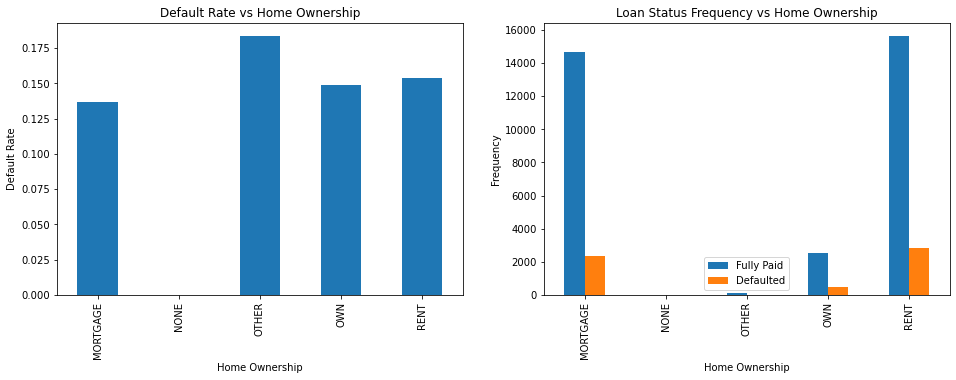

In [41]:
# plot the default rate against Home Ownership
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("Home Ownership")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Home Ownership")

loan2.groupby("Home Ownership")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Home Ownership")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Default rate does not depend much on home ownership as the default rate is almost same except for category 'None'.
For category 'None' there are only few records hence can be ignored.**

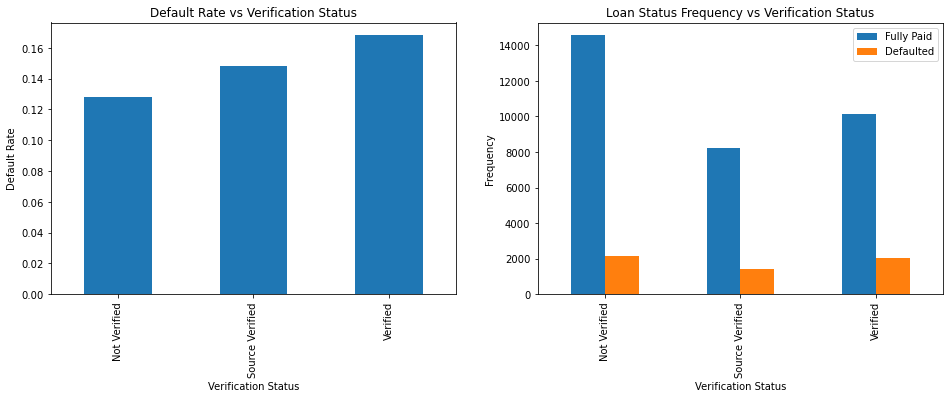

In [42]:
# plot the default rate against verification status
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("Verification Status")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Verification Status")

loan2.groupby("Verification Status")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Verification Status")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Default rate is does not depend much on verification status as the default rate is almost same**

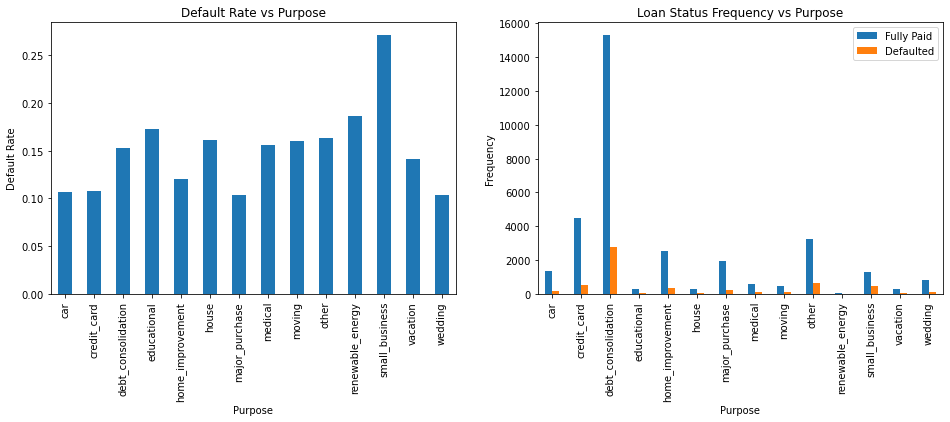

In [43]:
# plot the default rate against purpose
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("Purpose")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Purpose")

loan2.groupby("Purpose")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Purpose")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Loan taken for small business purpose has highest default rate**

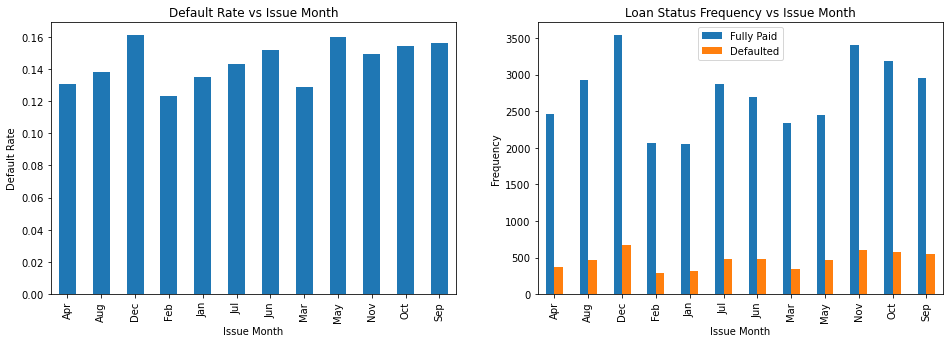

In [44]:
# plot the default rate against issue_d
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("Issue Month")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Issue Month")

loan2.groupby("Issue Month")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Issue Month")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Default rate is does not depend much on issue_d month as the default rate is almost same**

In [45]:
# Check the distribution of loan amount column
loan2["Loan Amount"].describe()

count    38577.000000
mean     10947.966405
std       7058.665784
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      29550.000000
Name: Loan Amount, dtype: float64

In [46]:
# Create a bin of 5 for loan amount column
loan2["Loan Amount bin"] =pd.cut(loan2["Loan Amount"],5)

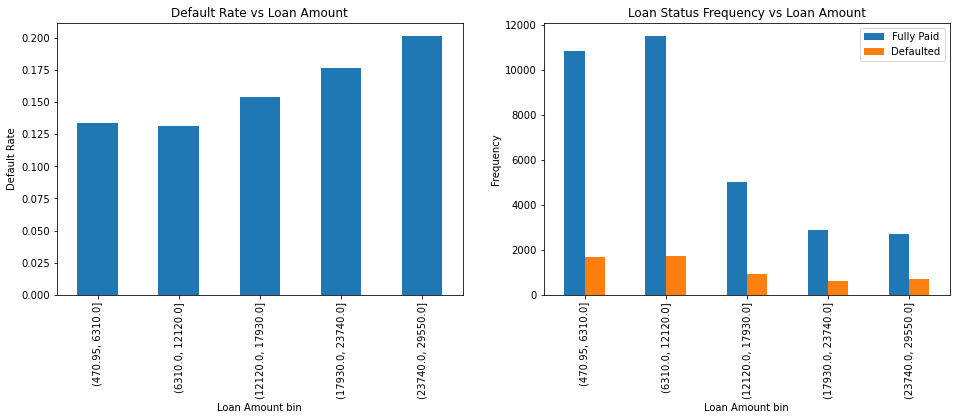

In [47]:
# plot the default rate against loan amount
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("Loan Amount bin")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Loan Amount")

loan2.groupby("Loan Amount bin")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Loan Amount")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Default rate is increases with increase in loan amount**

In [48]:
# Check the distribution of interest rate column
loan2["Interest Rate"].describe()

count    38577.000000
mean        11.931031
std          3.687751
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         22.540000
Name: Interest Rate, dtype: float64

In [49]:
# Create a bin of 3 for Interest Rate column
loan2["Interest Rate bin"] =pd.cut(loan2["Interest Rate"],3)

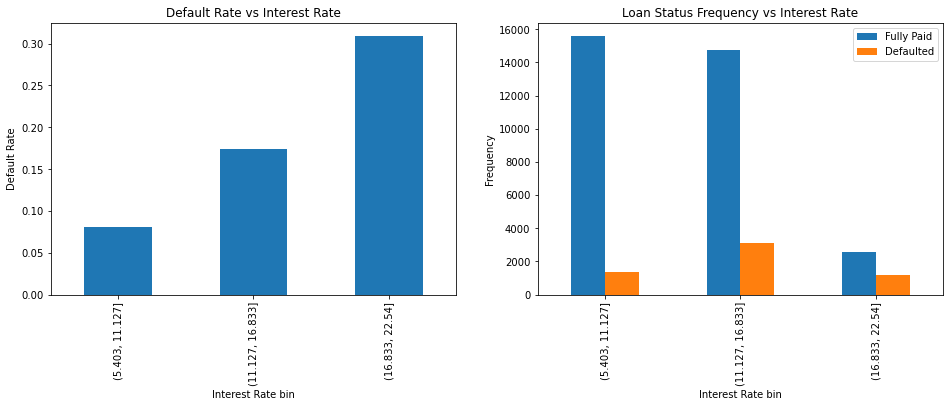

In [50]:
# plot the default rate against Interest Rate
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("Interest Rate bin")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Interest Rate")

loan2.groupby("Interest Rate bin")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Interest Rate")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Default rate is highest for interest rate more than 16.83%**

In [51]:
# Check the distribution of installment column
loan2["Installment Amount"].describe()

count    38577.000000
mean       318.767660
std        197.579507
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max        815.265000
Name: Installment Amount, dtype: float64

In [52]:
# Create a bin of 5 for installment column
loan2["Installment Amount bin"] =pd.cut(loan2["Installment Amount"],5)

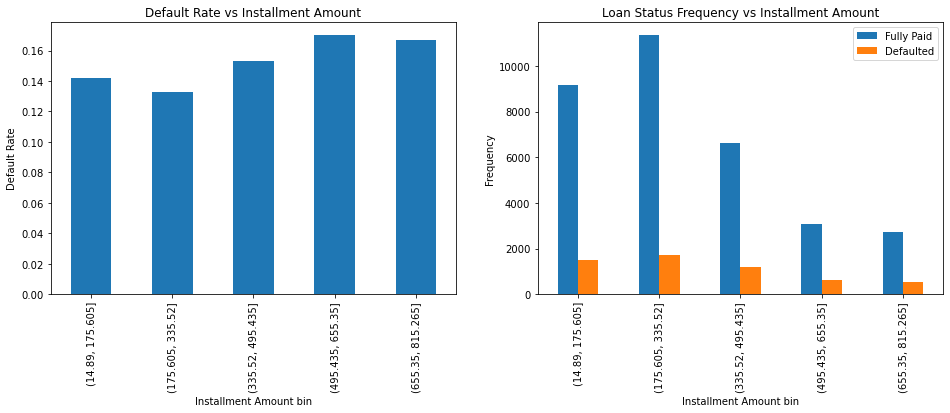

In [53]:
# plot the default rate against installment_bin
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("Installment Amount bin")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Installment Amount")

loan2.groupby("Installment Amount bin")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Installment Amount")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Installment amount has not much impact on default rate**

In [54]:
# Check the distribution of annual income column
loan2["Annual Income"].describe()

count     38577.000000
mean      65044.917784
std       32652.937415
min        4000.000000
25%       40000.000000
50%       58868.000000
75%       82000.000000
max      145000.000000
Name: Annual Income, dtype: float64

In [55]:
# Create a bin of 5 for annual income column
loan2["Annual Income bin"] =pd.cut(loan2["Annual Income"],5)

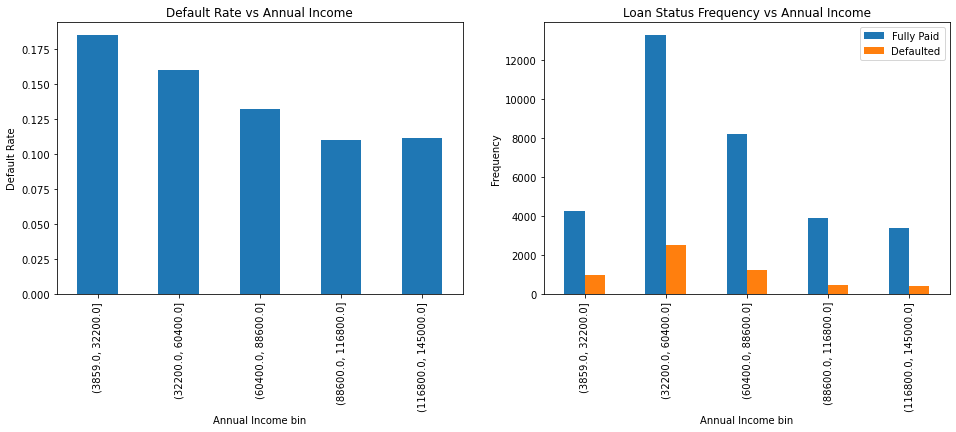

In [56]:
# plot the default rate against Annual Income bin
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("Annual Income bin")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs Annual Income")

loan2.groupby("Annual Income bin")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs Annual Income")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Lower annual income has highest default rate**

In [57]:
# Check the distribution of DebtToIncome column
loan2["DebtToIncome"].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: DebtToIncome, dtype: float64

In [58]:
# Create a bin of 5 for annual_inc column
loan2["DebtToIncome bin"] =pd.cut(loan2["DebtToIncome"],5)


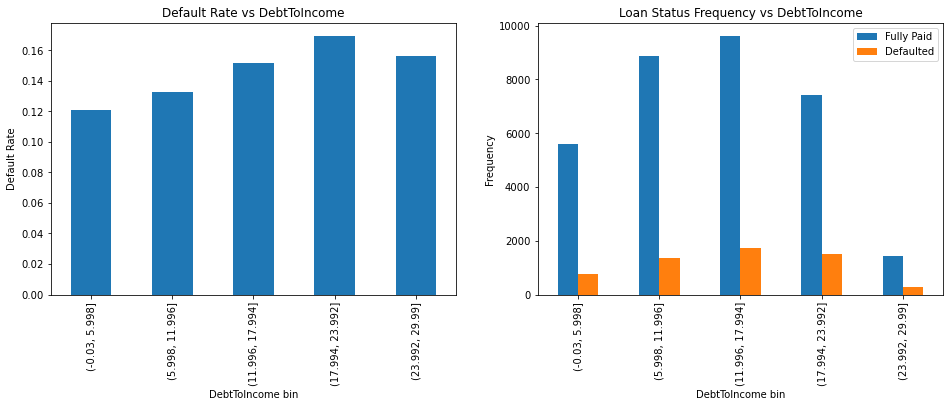

In [59]:
# plot the default rate against dti_bin
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
loan2.groupby("DebtToIncome bin")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs DebtToIncome")

loan2.groupby("DebtToIncome bin")["Loan Status"].value_counts().unstack().plot.bar(ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs DebtToIncome")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**DebtToIncome is not a crtical factor in determining the default rate as the value across different bin is almost same**

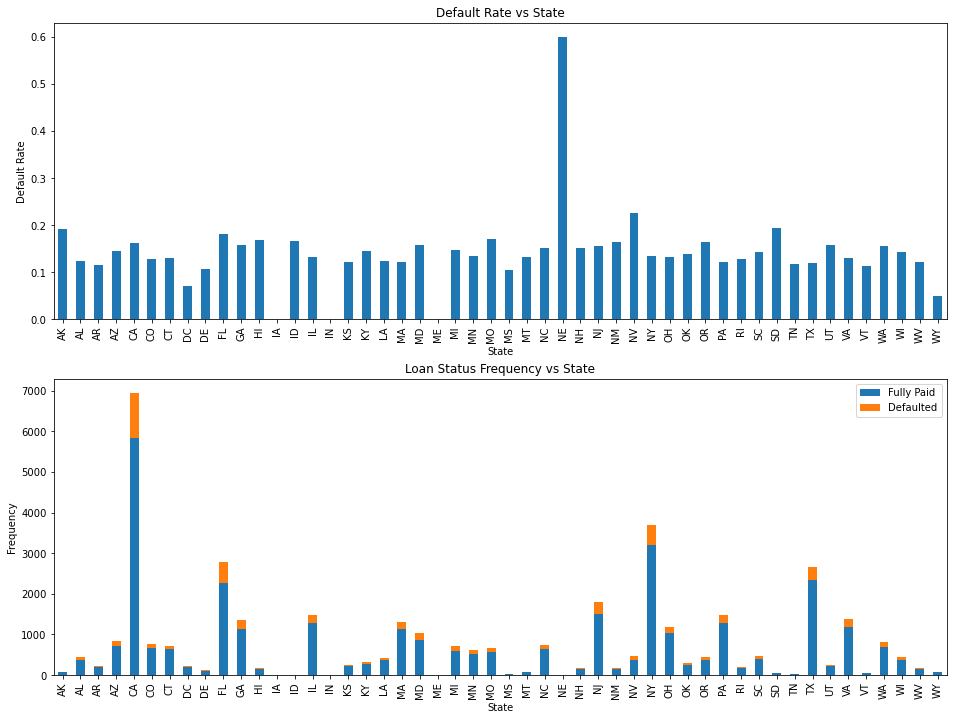

In [60]:
# plot the default rate against state
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
loan2.groupby("State")["Loan Status"].mean().plot.bar(ax=ax[0], ylabel = "Default Rate", title="Default Rate vs State")

loan2.groupby("State")["Loan Status"].value_counts().unstack().plot.bar(stacked = True,ax=ax[1], ylabel = "Frequency", title="Loan Status Frequency vs State")
plt.legend(["Fully Paid","Defaulted"]);
plt.show()


**Borrowers from NE have highest default rate**

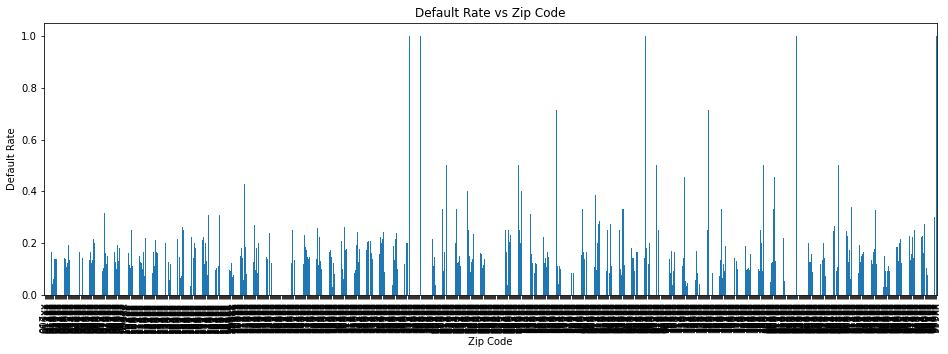

In [61]:
# plot the default rate against zip code
plt.figure(figsize = [16,5])
loan2.groupby("Zip Code")["Loan Status"].mean().plot.bar(ylabel = "Default Rate", title="Default Rate vs Zip Code")
plt.show()


**Above graph shows that for some zip code there are 100% default rate. Let's find out all the zip codes having more than 50% default rate**

In [62]:
#Find zip codes having more than 50% default rate
loan2.groupby("Zip Code")["Loan Status"].mean().where(lambda x : x > 0.5).dropna()


Zip Code
094xx    1.000000
373xx    1.000000
385xx    1.000000
561xx    0.714286
663xx    1.000000
669xx    1.000000
685xx    0.666667
689xx    1.000000
746xx    0.714286
833xx    1.000000
999xx    1.000000
Name: Loan Status, dtype: float64

In [63]:
# To identify the critical features which has more impact on loan status, 
# we can find out the difference between maximum and minimum default rate. If the difference is more than it'a a critical factor.
res={}
for col in ['Loan Term','Grade','Subgrade','Verification Status','Purpose','Issue Month','Loan Amount bin','Interest Rate bin','Installment Amount bin','Annual Income bin','DebtToIncome bin','State','Zip Code']:
    temp = loan2.groupby(col)["Loan Status"].mean()
    res[col] = max(temp)-min(temp)
pd.DataFrame(res.items())


,0,1
0,Loan Term,0.142229
1,Grade,0.277862
2,Subgrade,0.451537
3,Verification Status,0.039723
4,Purpose,0.167554
5,Issue Month,0.037869
6,Loan Amount bin,0.070173
7,Interest Rate bin,0.229190
8,Installment Amount bin,0.037237
9,Annual Income bin,0.074800


**Loan term, Grade, subgrade, purpose,interest rate, state and zip code has more impact on default rate. same pattern was shown in individual feature analysis**

**Bivariate Analysis---------------**

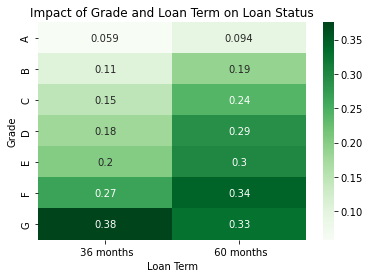

In [64]:
# Check the impact of grade and loan term on loan status
res = pd.pivot_table(data = loan2,index = "Grade",columns="Loan Term", values = "Loan Status", aggfunc = np.mean)
sns.heatmap(res,cmap = "Greens", annot = True)
plt.title("Impact of Grade and Loan Term on Loan Status")
plt.show()


**Grade F and G has higher default rate percentage across loan term. Highest for grade G and loan term 36 months**

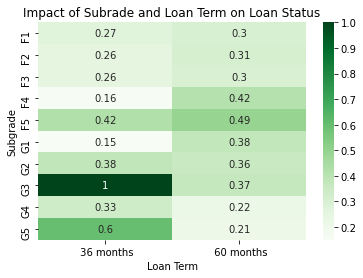

In [65]:
# Check the impact of subgrade and loan term on loan status
# Grade with F and G has higher default rate, so we can further analyze the subgrade of F and G
res = pd.pivot_table(data = loan2[loan2["Grade"].isin(["F","G"])],index = "Subgrade",columns="Loan Term", values = "Loan Status", aggfunc = np.mean)
sns.heatmap(res,cmap = "Greens", annot = True)
plt.title("Impact of Subrade and Loan Term on Loan Status")
plt.show()


**Subgrade G3 has 100% default rate and G5 has 60% default rate for lona term of 36 months**

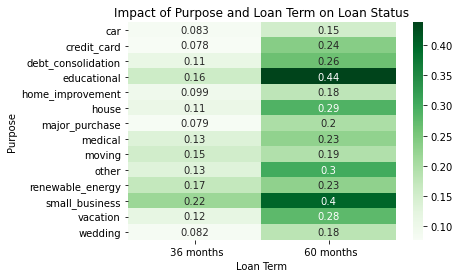

In [66]:
# Check the impact of purpose and loan term on loan status
res = pd.pivot_table(data = loan2,index = "Purpose",columns="Loan Term", values = "Loan Status", aggfunc = np.mean)
sns.heatmap(res,cmap = "Greens", annot = True)
plt.title("Impact of Purpose and Loan Term on Loan Status")
plt.show()


**Loan taken for Small Business and Education have the highest default rate for loan term of 60 months**

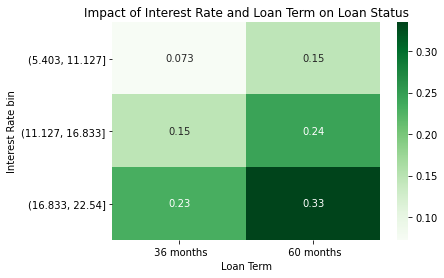

In [67]:
# Check the impact of interest rate and loan term on loan status
res = pd.pivot_table(data = loan2,index = "Interest Rate bin",columns="Loan Term", values = "Loan Status", aggfunc = np.mean)
sns.heatmap(res,cmap = "Greens", annot = True)
plt.title("Impact of Interest Rate and Loan Term on Loan Status")
plt.show()


**Loan taken with interest rate higher than 16.83% has highest default rate for 60 months loan term**

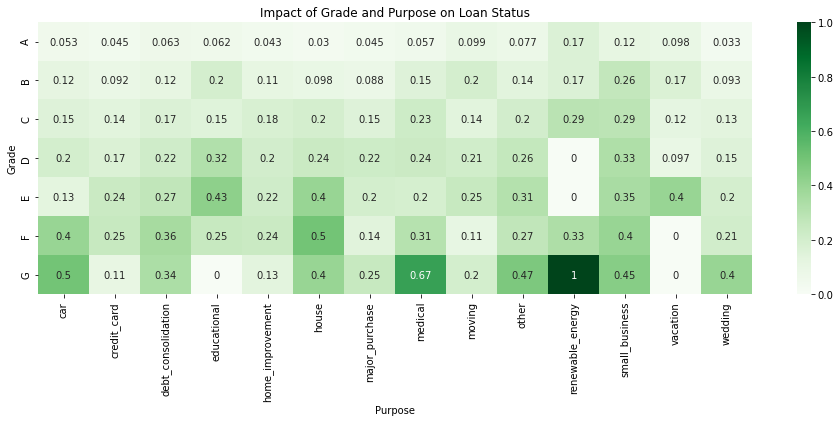

In [68]:
# Check the impact of grade and purpose on loan status
plt.figure(figsize = [16,5])
res = pd.pivot_table(data = loan2,index = "Grade",columns="Purpose", values = "Loan Status", aggfunc = np.mean)
sns.heatmap(res,cmap = "Greens", annot = True)
plt.title("Impact of Grade and Purpose on Loan Status")
plt.show()


**Loan taken by Grade G for renewal energy purpose has 100 % default rate and for medical purpose has around 67% default rate**

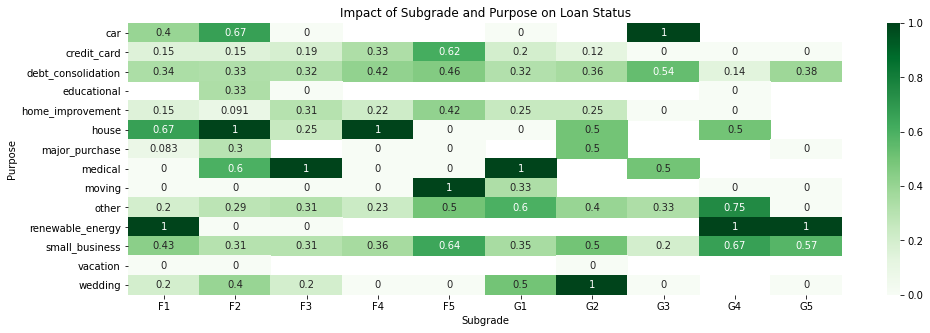

In [69]:
# Check the impact of subgrade and purpose on loan status
plt.figure(figsize = [16,5])
res = pd.pivot_table(data = loan2[loan2["Grade"].isin(["F","G"])],index = "Purpose",columns="Subgrade", values = "Loan Status", aggfunc = np.mean)
sns.heatmap(res,cmap = "Greens", annot = True)
plt.title("Impact of Subgrade and Purpose on Loan Status")
plt.show()

**These combination of subgrade and purpose of loan has 100% default rate**

| Purpose | SubGrade |
| :- | :- |
| Car | G3
| house | F2,F4
| medical | F3,G1
| moving | F5
| renewal energy | F1,G4,G5
| wedding | G2

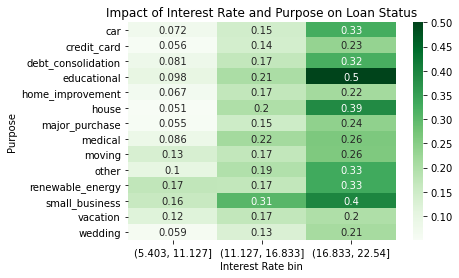

In [70]:
# Check the impact of interest rate and purpose on loan status
res = pd.pivot_table(data = loan2,index = "Purpose",columns="Interest Rate bin", values = "Loan Status", aggfunc = np.mean)
sns.heatmap(res,cmap = "Greens", annot = True)
plt.title("Impact of Interest Rate and Purpose on Loan Status")
plt.show()


**Loan taken with interest rate higher than 16.83% has highest deafult rate 
if loan is take for renewal enery, small business, house, medical and car purpose**

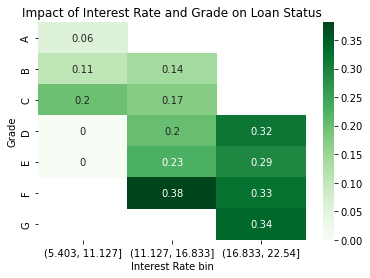

In [71]:
# Check the impact of interest rate and grade on loan status
res = pd.pivot_table(data = loan2,index = "Grade",columns="Interest Rate bin", values = "Loan Status", aggfunc = np.mean)
sns.heatmap(res,cmap = "Greens", annot = True)
plt.title("Impact of Interest Rate and Grade on Loan Status")
plt.show()


**Borrowers with grade D,E,F and G has very high default rate for loan taken with interest rate higher than 16.83%. 
Borrowers with grade F has the highest default rate even for loan taken with interest rate greater than 11% and less than 16.83%.**